# Linear regression

In [1]:
import pandas as pd

In [7]:
dataset=pd.read_excel("Linear Regression.xlsx",sheet_name=0)


In [9]:
dataset.head()

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0


In [10]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import preprocessing
x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
normalized_df=(df-df.mean())/df.std()

In [11]:
dataset.shape

(21613, 5)

In [12]:
dataset.describe()

,price,sqft_living,bedrooms,bathrooms,floors
count,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,2079.899736,3.370842,2.114757,1.494309
std,3.671272e+05,918.440897,0.930062,0.770163,0.539989
min,7.500000e+04,290.000000,0.000000,0.000000,1.000000
25%,3.219500e+05,1427.000000,3.000000,1.750000,1.000000
50%,4.500000e+05,1910.000000,3.000000,2.250000,1.500000
75%,6.450000e+05,2550.000000,4.000000,2.500000,2.000000
max,7.700000e+06,13540.000000,33.000000,8.000000,3.500000


In [13]:
dataset.isnull().any()

price          False
sqft_living    False
bedrooms       False
bathrooms      False
floors         False
dtype: bool

In [14]:
X=dataset[['sqft_living','bedrooms','bathrooms','floors']]

In [15]:
Y=dataset.price

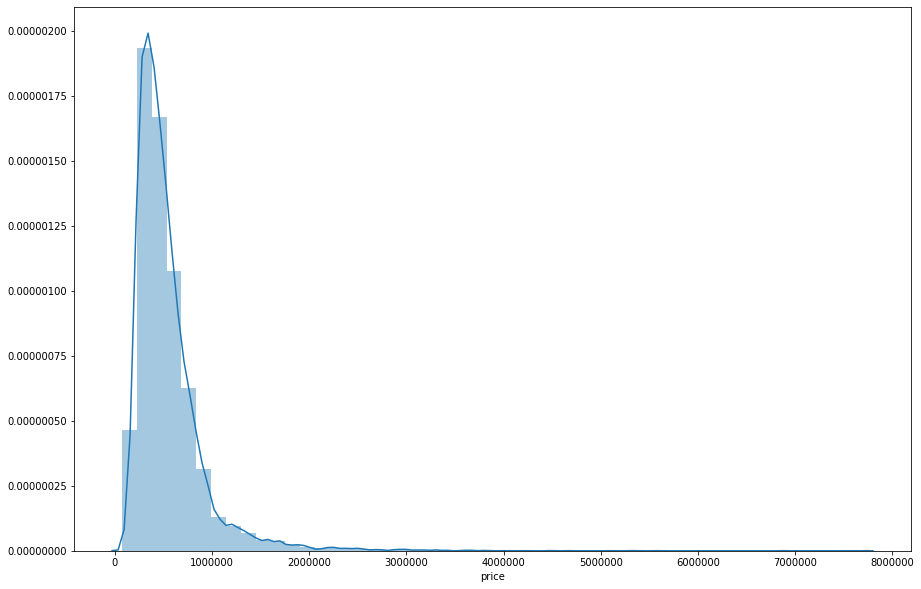

In [16]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(dataset['price'])

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [18]:
regressor = LinearRegression()  
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['coefficient'])  
coeff_df


,coefficient
sqft_living,310.855577
bedrooms,-54235.212195
bathrooms,1633.656805
floors,2182.860836


In [20]:
Y_pred = regressor.predict(X_test)

In [21]:
df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
df1 = df.head(25)
df1

,Actual,Predicted
17384,297000,4.158436e+05
722,1578000,1.315221e+06
2680,562100,4.133612e+05
18754,631500,3.174044e+05
14554,780000,8.508212e+05
16227,485000,4.294474e+05
6631,340000,4.494329e+05
19813,335606,7.054872e+05
3367,425000,6.270052e+05
21372,490000,1.198298e+06


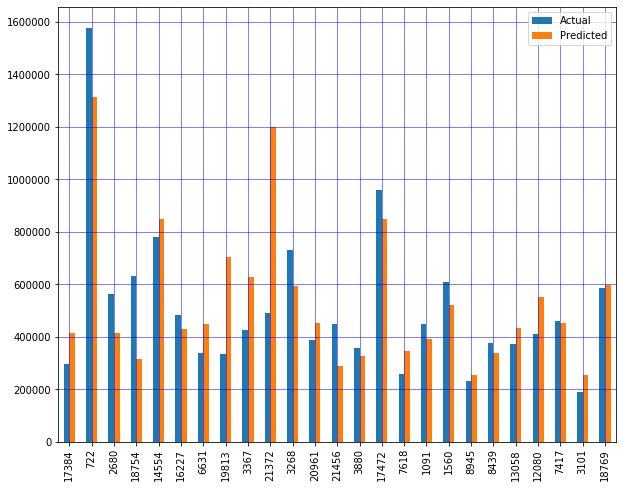

In [22]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='blue')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='green')
plt.show()

In [23]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

Mean Absolute Error: 169669.0001695836
Mean Squared Error: 66379302151.73661
Root Mean Squared Error: 257641.80978974784


In [24]:
dataset.corr()

,price,sqft_living,bedrooms,bathrooms,floors
price,1.000000,0.702035,0.308350,0.525138,0.256794
sqft_living,0.702035,1.000000,0.576671,0.754665,0.353949
bedrooms,0.308350,0.576671,1.000000,0.515884,0.175429
bathrooms,0.525138,0.754665,0.515884,1.000000,0.500653
floors,0.256794,0.353949,0.175429,0.500653,1.000000


All the independent variables like sqft_living , bedrooms , bathrooms , floors are positively correlated . price and sqft_living are strongly correlated as the value is .702 and is above .5 price and bedrooms are weakly correlated as the value is .308 whcih is lesser than .5 price and bathrooms are moderately correlated as the value is .525 which is almost near to .5 price and floor are weakly correlated a sthe value is .256 which is lesser than .5

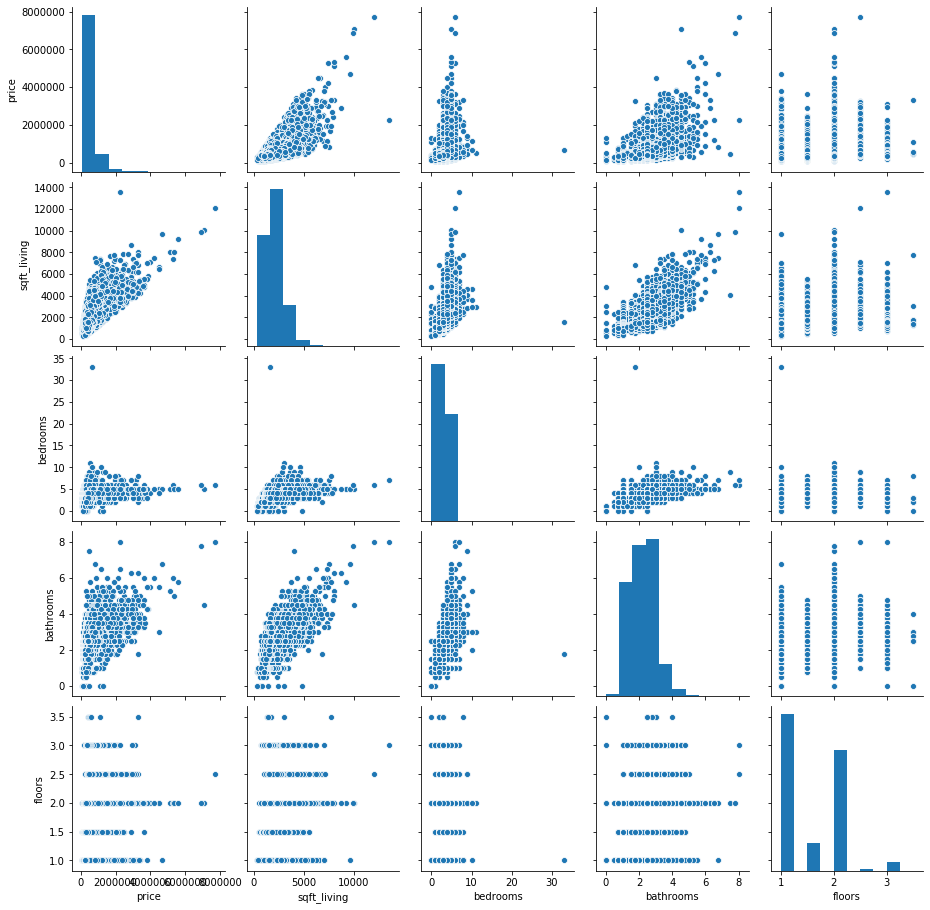

In [25]:
import seaborn as sns
sns.pairplot(dataset)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018768684908>,
      dtype=object)

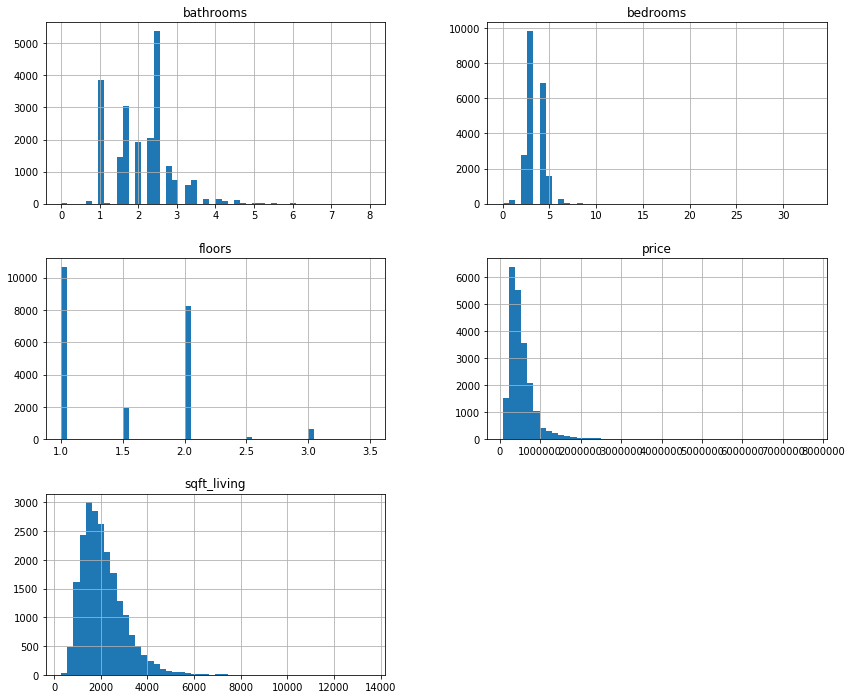

In [26]:
dataset.hist(figsize=(14,12), bins=50)

In [27]:
from sklearn.metrics import r2_score
print(f"R-Square score is {r2_score(Y_test, Y_pred)}")

R-Square score is 0.5003085644927433


# Regression attrition

In [28]:
import pandas as pd

In [29]:
dataset=pd.read_csv("general_data.csv")

In [30]:
dataset.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [31]:
Y=dataset.Attrition

In [32]:
X=dataset[['Age','BusinessTravel','Department','DistanceFromHome','Education','EducationField','Gender','NumCompaniesWorked','PercentSalaryHike','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsSinceLastPromotion','YearsWithCurrManager','JobLevel','JobRole','MaritalStatus','MonthlyIncome']]

In [33]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dataset["Department"]=le.fit_transform(dataset["Department"])

In [34]:
dataset["BusinessTravel"]=le.fit_transform(dataset["BusinessTravel"])

In [35]:
dataset["Attrition"]=le.fit_transform(dataset["Attrition"])

In [36]:
dataset["EducationField"]=le.fit_transform(dataset["EducationField"])

In [37]:
dataset["Gender"]=le.fit_transform(dataset["Gender"])

In [38]:
dataset["Over18"]=le.fit_transform(dataset["Over18"])

In [39]:
dataset["JobRole"]=le.fit_transform(dataset["JobRole"])

In [40]:
dataset["MaritalStatus"]=le.fit_transform(dataset["MaritalStatus"])

In [41]:
dataset.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,0,2,2,6,2,1,1,1,0,...,1.0,0,11,8,0,1.0,6,1,0,0
1,31,1,1,1,10,1,1,1,2,0,...,0.0,0,23,8,1,6.0,3,5,1,4
2,32,0,1,1,17,4,4,1,3,1,...,1.0,0,15,8,3,5.0,2,5,0,3
3,38,0,0,1,2,5,1,1,4,1,...,3.0,0,11,8,3,13.0,5,8,7,5
4,32,0,2,1,10,1,3,1,5,1,...,4.0,0,12,8,2,9.0,2,6,0,4


In [42]:
import statsmodels.api as sm

In [43]:
X1=sm.add_constant(X)

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in reduce
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [44]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   int32  
 2   BusinessTravel           4410 non-null   int32  
 3   Department               4410 non-null   int32  
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   int32  
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   int32  
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   int32  
 12  MaritalStatus            4410 non-null   int32  
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [45]:
dataset["NumCompaniesWorked"]=le.fit_transform(dataset["NumCompaniesWorked"])

In [46]:
dataset["TotalWorkingYears"]=le.fit_transform(dataset["TotalWorkingYears"])

In [47]:
sm.tools.categorical

<function statsmodels.tools.tools.categorical(data, col=None, dictnames=False, drop=False)>

In [48]:
import statsmodels.api as sm

In [49]:
Y=dataset.Attrition

In [50]:
X=dataset[['Age','BusinessTravel','Department','DistanceFromHome','Education','EducationField','Gender','NumCompaniesWorked','PercentSalaryHike','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsSinceLastPromotion','YearsWithCurrManager','JobLevel','JobRole','MaritalStatus','MonthlyIncome']]

In [51]:
X1=sm.add_constant(X)

In [52]:
logistic=sm.Logit(Y,X1)

In [53]:
result=logistic.fit()

Optimization terminated successfully.
         Current function value: 0.394467
         Iterations 7


In [54]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 4410
Model:                          Logit   Df Residuals:                     4390
Method:                           MLE   Df Model:                           19
Date:                Sun, 09 Aug 2020   Pseudo R-squ.:                  0.1069
Time:                        20:08:30   Log-Likelihood:                -1739.6
converged:                       True   LL-Null:                       -1947.9
Covariance Type:            nonrobust   LLR p-value:                 1.576e-76
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.1219      0.413      0.295      0.768      -0.687       0.931
Age                        -0.0312      0.007     -4.593      0.000      -0.045      -0.018
BusinessTravel             -0.0217      0.065     -0.332      0.740      -0.150       0.106
Department                 -0.2385      0.081     -2.943      0.003      -0.397      -0.080
DistanceFromHome           -0.0011      0.005     -0.206      0.837      -0.012       0.009
Education                  -0.0635      0.043     -1.495      0.135      -0.147       0.020
EducationField             -0.0996      0.033     -2.991      0.003      -0.165      -0.034
Gender                      0.0759      0.089      0.850      0.395      -0.099       0.251
NumCompaniesWorked          0.0866      0.016      5.422      0.000       0.055       0.118
PercentSalaryHike           0.0130      0.012      1.108      0.268      -0.010       0.036
StockOptionLevel           -0.0630      0.052     -1.221      0.222      -0.164       0.038
TotalWorkingYears          -0.0458      0.011     -4.082      0.000      -0.068      -0.024
TrainingTimesLastYear      -0.1453      0.035     -4.132      0.000      -0.214      -0.076
YearsAtCompany              0.0012      0.018      0.069      0.945      -0.034       0.036
YearsSinceLastPromotion     0.1330      0.020      6.514      0.000       0.093       0.173
YearsWithCurrManager       -0.1391      0.022     -6.306      0.000      -0.182      -0.096
JobLevel                   -0.0279      0.040     -0.704      0.481      -0.105       0.050
JobRole                     0.0365      0.018      2.044      0.041       0.002       0.072
MaritalStatus               0.5886      0.063      9.332      0.000       0.465       0.712
MonthlyIncome           -1.855e-06   9.56e-07     -1.939      0.052   -3.73e-06    1.96e-08
===========================================================================================
"""

# Inference:The attributes which are more significant are:
Age Marital Status NumCompaniesWorked TotalWorkingYears TrainingTimesLastYear YearsSinceLastPromotion YearsWithCurrManager

# attributes less significant
Gender Department EducationField JobRole Monthly income Stock option level Job level Percentage salary hike

# attributes not significant
Business Travel Distance From Home years at company

# Bank loan regression¶

In [58]:
dataset=pd.read_excel("Bank_Personal_Loan_Modelling dataset.head()(1).xlsx",sheet_name=1)

In [59]:
dataset.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [60]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [61]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dataset["CCAvg"]=le.fit_transform(dataset["CCAvg"])

In [62]:
dataset.head()
dataset.le
dataset.isnull().any()

ID                    False
Age                   False
Experience            False
Income                False
ZIP Code              False
Family                False
CCAvg                 False
Education             False
Mortgage              False
Personal Loan         False
Securities Account    False
CD Account            False
Online                False
CreditCard            False
dtype: bool